In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab 
import scipy.stats as stats

In [2]:
#read the dataset
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

1    0.544554
0    0.455446
Name: target, dtype: float64


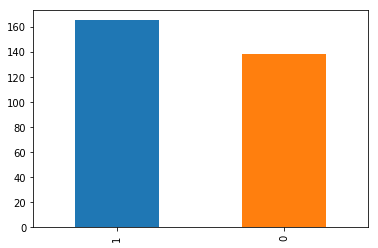

In [5]:
#check the distribution of target
df['target'].value_counts().plot.bar()
print(df['target'].value_counts()/df.shape[0])

In [6]:
#Both heart disease , non heqrt disease people are almost same in number

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#there is null values in this dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


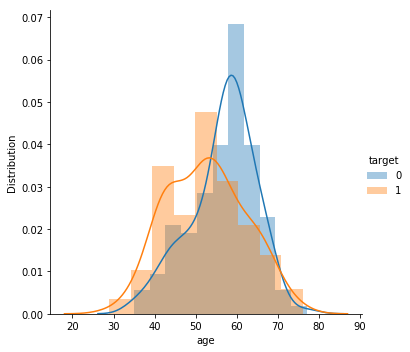

In [10]:
sns.FacetGrid(df,hue='target',size=5)\
    .map(sns.distplot,df.columns[0])\
    .add_legend();
plt.ylabel("Distribution")      
plt.show()

In [11]:
df.groupby('target')['age'].median()

target
0    58
1    52
Name: age, dtype: int64

In [96]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [97]:
df.groupby('target')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,138.0,56.601449,7.962082,35.0,52.0,58.0,62.0,77.0
1,165.0,52.496970,9.550651,29.0,44.0,52.0,59.0,76.0


sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64


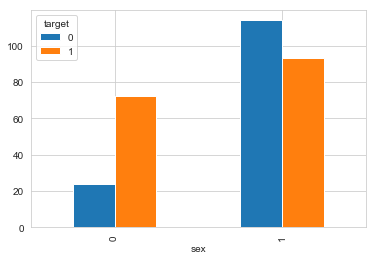

In [95]:

df.groupby('sex')['target'].value_counts().unstack().plot.bar()
print(df.groupby('sex')['target'].value_counts())

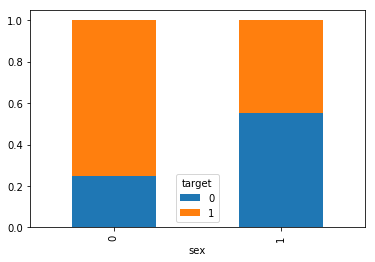

In [13]:
df.groupby('sex')['target'].value_counts(normalize=True).unstack().plot.bar(stacked=True)


cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: target, dtype: int64


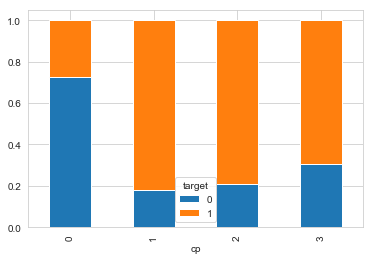

In [77]:
df.groupby('cp')['target'].value_counts(normalize=True).unstack().plot.bar(stacked=True)
print(df.groupby('cp')['target'].value_counts())

#once cp occurs ,there are high chance of getting heart disease.


In [102]:
values=df['cp'].value_counts(normalize=True).values

In [104]:
index=df['cp'].value_counts(normalize=True).index

([<matplotlib.patches.Wedge at 0x15252ba8>,
 [Text(0.09681809669550348, 1.0957309232435946, '0'),
  Text(-0.8227797907748032, -0.730091375029572, '2'),
  Text(0.5986246155747549, -0.9228480750524309, '1'),
  Text(1.0688703878101182, -0.2598385923273283, '3')],
 [Text(0.052809870924820076, 0.5976714126783242, '47.2%'),
  Text(-0.44878897678625623, -0.3982316591070392, '28.7%'),
  Text(0.3265225175862299, -0.5033716773013259, '16.5%'),
  Text(0.5830202115327917, -0.14173014126945177, '7.6%')])

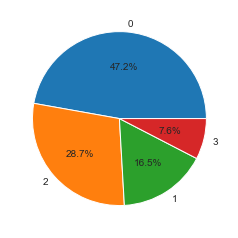

In [105]:
plt.pie(values,labels=index,autopct='%1.1f%%')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


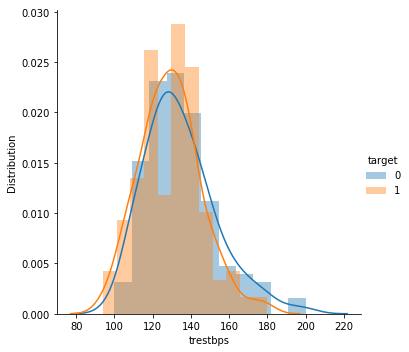

In [14]:
sns.FacetGrid(df,hue='target',size=5)\
    .map(sns.distplot,df.columns[3])\
    .add_legend();
plt.ylabel("Distribution")      
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


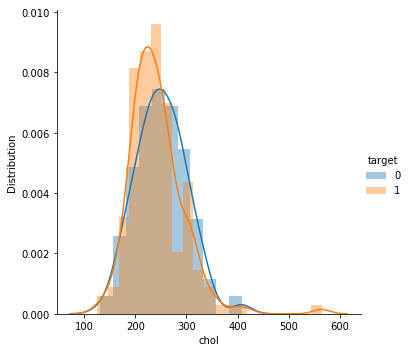

In [15]:
sns.FacetGrid(df,hue='target',size=5)\
    .map(sns.distplot,df.columns[4])\
    .add_legend();
plt.ylabel("Distribution")      
plt.show()

In [16]:
df.groupby('target')['chol'].median()

target
0    249
1    234
Name: chol, dtype: int64

fbs  target
0    1         142
     0         116
1    1          23
     0          22
Name: target, dtype: int64


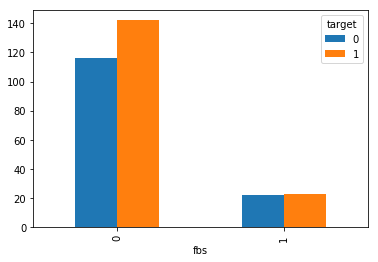

In [17]:
df.groupby('fbs')['target'].value_counts().unstack().plot.bar()
print(df.groupby('fbs')['target'].value_counts())

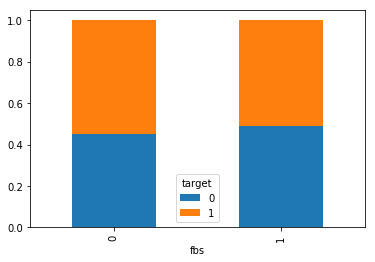

In [18]:
df.groupby('fbs')['target'].value_counts(normalize=True).unstack().plot.bar(stacked=True)

restecg  target
0        0         79
         1         68
1        1         96
         0         56
2        0          3
         1          1
Name: target, dtype: int64


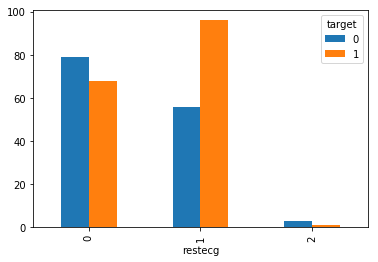

In [19]:
df.groupby('restecg')['target'].value_counts().unstack().plot.bar()
print(df.groupby('restecg')['target'].value_counts())

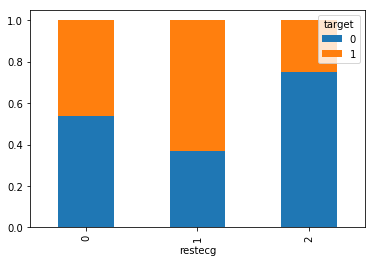

In [20]:
df.groupby('restecg')['target'].value_counts(normalize=True).unstack().plot.bar(stacked=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


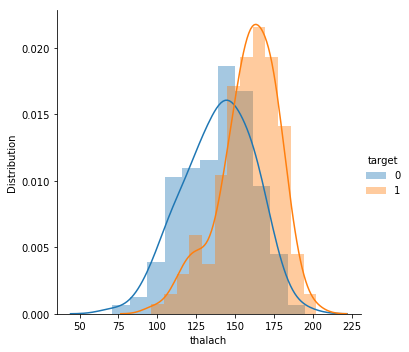

target
0    142
1    161
Name: thalach, dtype: int64

In [21]:
sns.FacetGrid(df,hue='target',size=5)\
    .map(sns.distplot,df.columns[7])\
    .add_legend();
plt.ylabel("Distribution")      
plt.show()
df.groupby('target')['thalach'].median()

exang  target
0      1         142
       0          62
1      0          76
       1          23
Name: target, dtype: int64


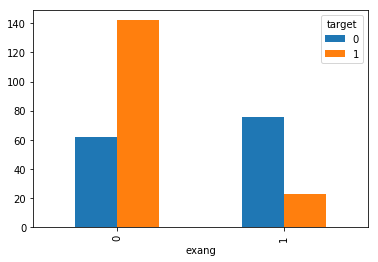

In [22]:
df.groupby('exang')['target'].value_counts().unstack().plot.bar()
print(df.groupby('exang')['target'].value_counts())

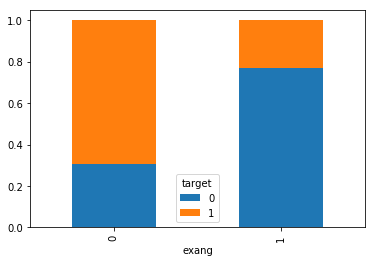

In [23]:
df.groupby('exang')['target'].value_counts(normalize=True).unstack().plot.bar(stacked=True)

Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood. It may feel like pressure or squeezing in your chest. The discomfort also can occur in your shoulders, arms, neck, jaw, or back. Angina pain may even feel like indigestion. 

when there is no exercise induced angina(=0) are more prone to heart disease. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


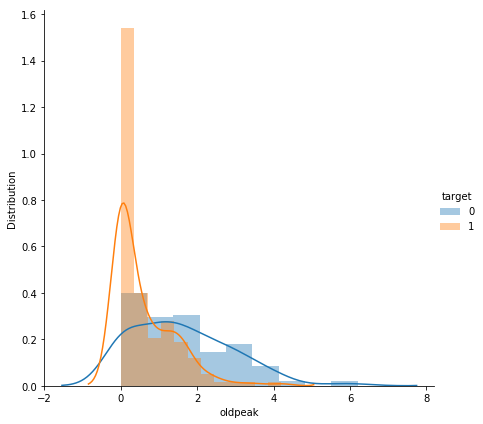

target
0    1.4
1    0.2
Name: oldpeak, dtype: float64

In [24]:
sns.FacetGrid(df,hue='target',size=6)\
    .map(sns.distplot,df.columns[9])\
    .add_legend();
plt.ylabel("Distribution")      
plt.show()
df.groupby('target')[df.columns[9]].median()

slope  target
0      0          12
       1           9
1      0          91
       1          49
2      1         107
       0          35
Name: target, dtype: int64


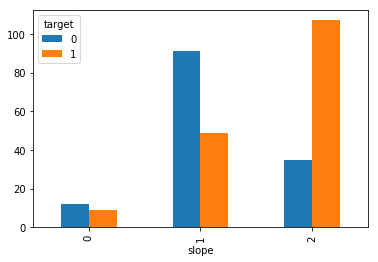

In [33]:

df.groupby('slope')['target'].value_counts().unstack().plot(kind='bar')
print(df.groupby('slope')['target'].value_counts())



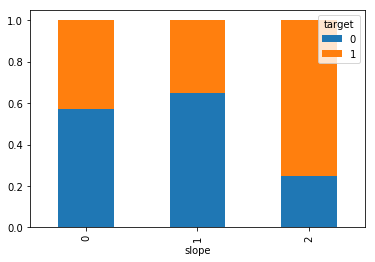

In [35]:
df.groupby('slope')['target'].value_counts(normalize=True).unstack().plot.bar(stacked=True)

ca  target
0   1         130
    0          45
1   0          44
    1          21
2   0          31
    1           7
3   0          17
    1           3
4   1           4
    0           1
Name: target, dtype: int64


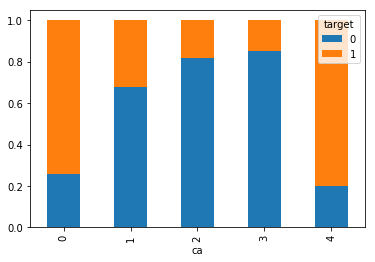

In [44]:
df.groupby('ca')['target'].value_counts(normalize=True).unstack().plot.bar(stacked=True)
print(df.groupby('ca')['target'].value_counts())



#ca:Number of major vessels (0–4) colored by fluoroscopy
Number of major vessels working good not sure about this parameter,
if it is 0 major vessels also there are more number of  heart patient.
major vessels (1,2,3) are less likely prone to heart disease.
major vessels(ca) categories 4 has more chance of having heart disease in dataset very less number of samples.



thal  target
0     0           1
      1           1
1     0          12
      1           6
2     1         130
      0          36
3     0          89
      1          28
Name: target, dtype: int64


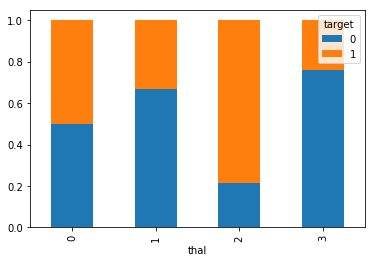

In [46]:
df.groupby('thal')['target'].value_counts(normalize=True).unstack().plot.bar(stacked=True)
print(df.groupby('thal')['target'].value_counts())



Thalassemias are inherited blood disorders characterized by decreased hemoglobin production.
Symptoms depend on the type and can vary from none to severe.
thal : 3 = normal; 6 = fixed defect; 7 = reversible defect

some data labelling problem thal =0 seems to be two points.
thal =2 has more probability of getting heart disease

In [52]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


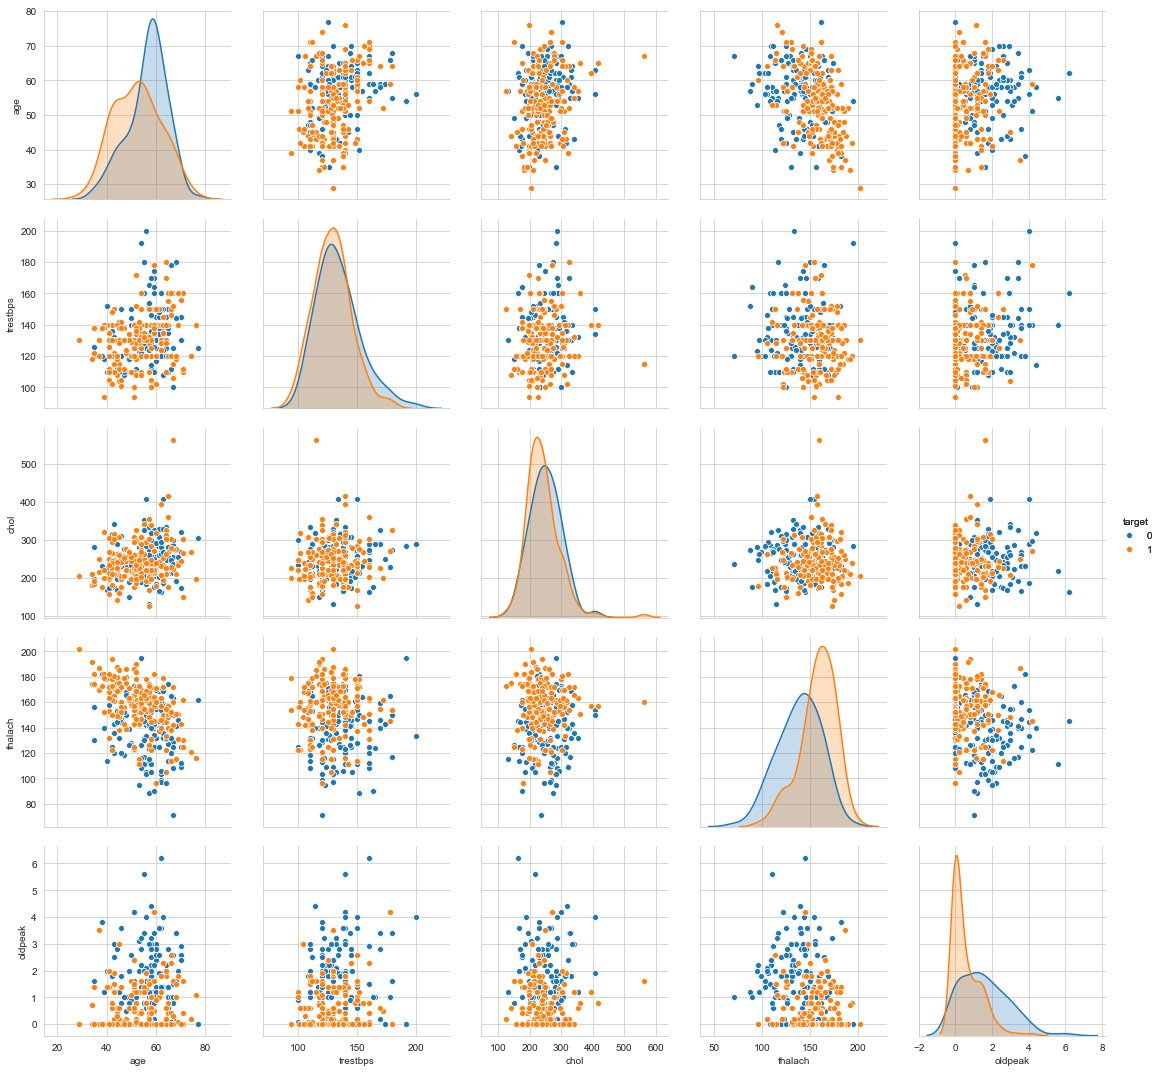

In [54]:
sns.set_style("whitegrid")
sns.pairplot(df,vars =['age','trestbps','chol','thalach','oldpeak'],hue = "target", size = 3).add_legend();
plt.show()

In [75]:
corrmat = df[['age','trestbps','chol','thalach','oldpeak']].corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.5]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr


none of the features are correlated among themselves
oldpeal ,thalch distribution showing some variation considerablely important features where as overlap distribution.

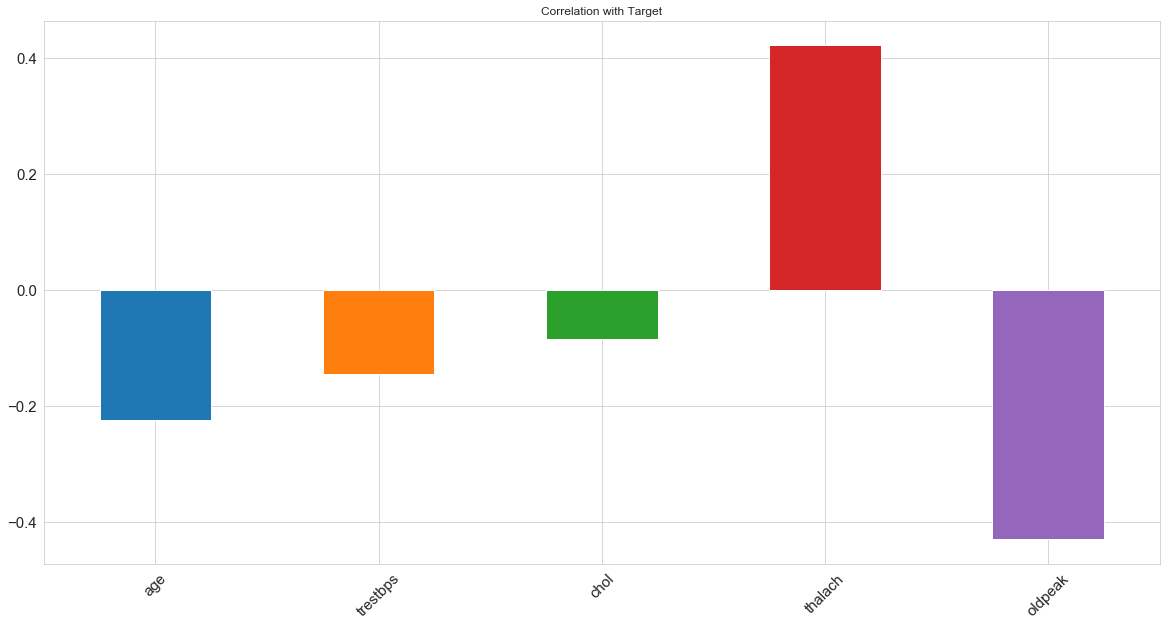

In [59]:
df[['age','trestbps','chol','thalach','oldpeak']].corrwith(df['target']).plot.bar(figsize=(20,10),rot=45,grid=True,fontsize=15,title='Correlation with Target')

#thalach increases , probability of getting heart disease increases
#oldpeak decreases, there is slight probability of getting heart disease increases

[0.00724638 0.02173913 0.07246377 0.11594203 0.18115942 0.20289855
 0.15942029 0.17391304 0.05797101 0.00724638]
[ 71.   83.4  95.8 108.2 120.6 133.  145.4 157.8 170.2 182.6 195. ]
[0.01212121 0.03030303 0.04848485 0.04848485 0.10909091 0.20606061
 0.24848485 0.20606061 0.07272727 0.01818182]
[ 96.  106.6 117.2 127.8 138.4 149.  159.6 170.2 180.8 191.4 202. ]


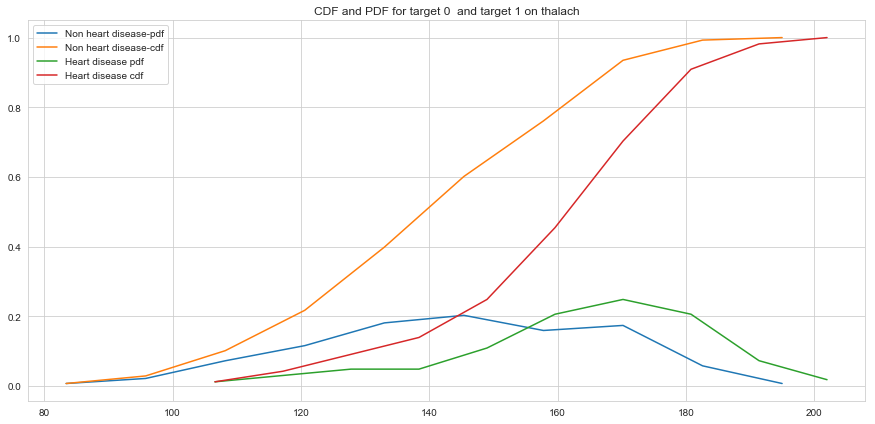

In [82]:
df0=df[df['target']==0]
df1=df[df['target']==1]
plt.figure(figsize=(15,7))
counts, bin_edge = np.histogram(df0['thalach'],bins = 10, density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edge)
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)

counts, bin_edge = np.histogram(df1['thalach'],bins = 10, density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edge)
cdf = np.cumsum(pdf)

plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)
plt.legend(['Non heart disease-pdf','Non heart disease-cdf','Heart disease pdf','Heart disease cdf']);

plt.title('CDF and PDF for target 0  and target 1 on thalach')
plt.show()

#by observing above chart >160 heart rate less chance getting heart disease
85% percentage of non disease people lessthan 160 when it comes to disease people ,only 45% people available 

[0.27536232 0.20289855 0.13768116 0.12318841 0.13043478 0.07246377
 0.03623188 0.00724638 0.         0.01449275]
[0.   0.62 1.24 1.86 2.48 3.1  3.72 4.34 4.96 5.58 6.2 ]
[0.58787879 0.13333333 0.08484848 0.10909091 0.04242424 0.01818182
 0.00606061 0.00606061 0.00606061 0.00606061]
[0.   0.42 0.84 1.26 1.68 2.1  2.52 2.94 3.36 3.78 4.2 ]


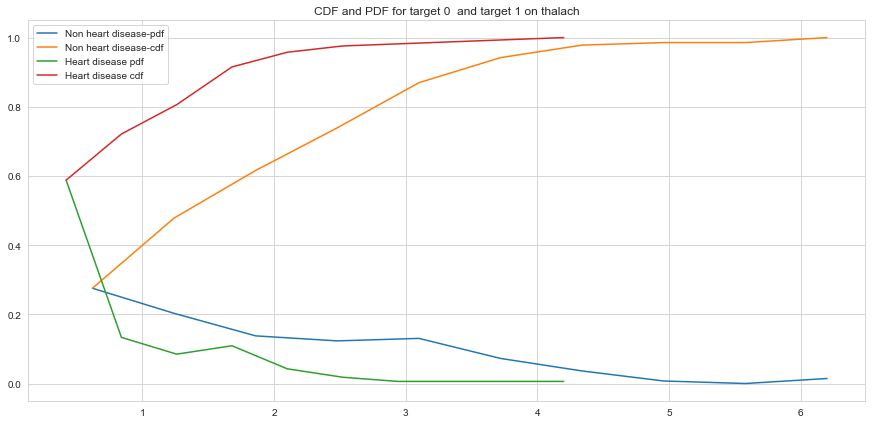

In [87]:
#oldpeak
df0=df[df['target']==0]
df1=df[df['target']==1]
plt.figure(figsize=(15,7))
counts, bin_edge = np.histogram(df0['oldpeak'],bins = 10, density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edge)
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)

counts, bin_edge = np.histogram(df1['oldpeak'],bins = 10, density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edge)
cdf = np.cumsum(pdf)

plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)
plt.legend(['Non heart disease-pdf','Non heart disease-cdf','Heart disease pdf','Heart disease cdf']);

plt.title('CDF and PDF for target 0  and target 1 on thalach')
plt.show()

In [88]:
#old peak value greater than 4 , likely to be no heart disease.

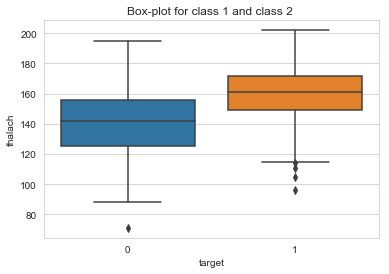

In [90]:
sns.boxplot(x ='target', y = 'thalach', data = df)
plt.title("Box-plot for class 1 and class 2 ")
plt.show()

In [93]:
df['target'].value_counts()/df.shape[0]

1    0.544554
0    0.455446
Name: target, dtype: float64